In [2]:
import numpy as np
import matplotlib.pyplot as plt

hiapp70 = '2021-03-03_IAPP_2n5_sliceA_70V_dt_extracted.txt'
arrtime = []
intensity = []
with open (hiapp70, 'r') as f:
    for dataline in f:
        dataline = dataline.replace('\n', '')
        arrtime_intensity = dataline.split('\t')
        arrtime.append(float(arrtime_intensity[0]))
        intensity.append(float(arrtime_intensity[1]))
x = np.array(arrtime)
y = np.array(intensity)
print(arrtime)
print(intensity)

[54.982, 55.228, 55.474, 55.72, 55.966, 56.212, 56.458, 56.704, 56.95, 57.196, 57.442, 57.688, 57.934, 58.18, 58.426, 58.672, 58.918, 59.164, 59.41, 59.656, 59.902, 60.148, 60.394, 60.64, 60.886, 61.132, 61.378, 61.624, 61.87, 62.116, 62.362, 62.608, 62.854, 63.1, 63.346, 63.592, 63.838, 64.084, 64.33, 64.576, 64.822, 65.068, 65.314, 65.56, 65.806, 66.052, 66.298, 66.544, 66.79, 67.036, 67.282, 67.528, 67.774, 68.02, 68.266, 68.512, 68.758, 69.004, 69.25, 69.496, 69.742, 69.988, 70.234, 70.48, 70.726, 70.972, 71.218, 71.464, 71.71, 71.956, 72.202, 72.448, 72.694, 72.94, 73.186, 73.432, 73.678, 73.924, 74.17, 74.416, 74.662, 74.908, 75.154, 75.4, 75.646, 75.892, 76.138, 76.384, 76.63, 76.876, 77.122, 77.368, 77.614, 77.86, 78.106, 78.352, 78.598, 78.844, 79.09, 79.336, 79.582, 79.828, 80.074, 80.32, 80.566, 80.812, 81.058, 81.304, 81.55, 81.796, 82.042, 82.288, 82.534, 82.78, 83.026, 83.272, 83.518, 83.764, 84.01, 84.256, 84.502, 84.748, 84.994, 85.24, 85.486, 85.732, 85.978, 86.224, 86

(55.0, 75.0)

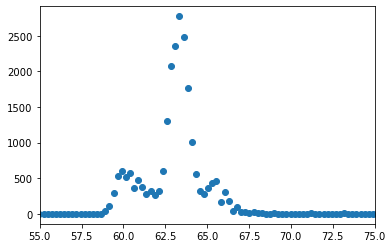

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.xlim(55,75)

#change xlim so a bit more comparable to graph at end

In [4]:
#now going to stack the x,y arrays into single 2d array
xy = np.column_stack((x,y))
#print (xy)

In [5]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 7)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(xy)
          for n in n_components]

#print(models)
plt.plot(n_components, [m.bic(xy) for m in models], label='BIC')
plt.plot(n_components, [m.aic(xy) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

#3 components?

[GaussianMixture(random_state=0), GaussianMixture(n_components=2, random_state=0), GaussianMixture(n_components=3, random_state=0), GaussianMixture(n_components=4, random_state=0), GaussianMixture(n_components=5, random_state=0), GaussianMixture(n_components=6, random_state=0)]


C:\Users\tempeparsons\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


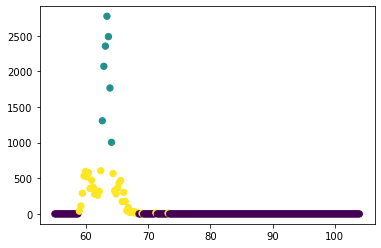

In [14]:
from sklearn.mixture import GaussianMixture
gm = GaussianMixture(n_components=3).fit(xy)
labels = gm.predict(xy)
plt.scatter(xy[:, 0], xy[:, 1], c=labels, s=40, cmap='viridis');

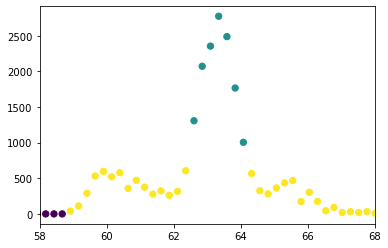

In [15]:
gm = GaussianMixture(n_components=3, covariance_type='full', random_state=42).fit(xy)
labels = gm.predict(xy)
plt.scatter(xy[:, 0], xy[:, 1], c=labels, s=40, cmap='viridis')
plt.xlim(58, 68);

In [26]:
hist_list = []

for index, intensity in enumerate(y):
    time = x[index]
    hist_list += [time]*int(intensity)
print(len(hist_list))
hist_arr = np.array(hist_list)
#print(y_hist_arr)
#print(hist_arr)


22824


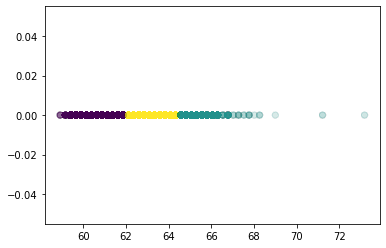

In [22]:
hist_arr = hist_arr.reshape(-1,1)
gm = GaussianMixture(n_components=3, max_iter=1000, init_params='kmeans', 
                     covariance_type='full', random_state=0).fit(hist_arr) #default init kmeans
labels = gm.predict(hist_arr)
fake_y = [0]*len(labels)
plt.scatter(hist_arr, fake_y, c=labels, s=40, cmap='viridis',alpha=0.02);

##TRY DIFFERENT INIT METHODS: 
#https://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_init.html#sphx-glr-auto-examples-mixture-plot-gmm-init-py

#try and plot the gaussian curves given the mean and sd of the below clustering.
#hopefully these will look like the original data
#or at the least get the means,sd of both and compare

{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 1000, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': 0, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
[[9.99981455e-01 1.85447301e-05 2.88455636e-13]
 [9.99981455e-01 1.85447301e-05 2.88455636e-13]
 [9.99981455e-01 1.85447301e-05 2.88455636e-13]
 ...
 [6.99964755e-55 1.00000000e+00 7.21690282e-64]
 [6.99964755e-55 1.00000000e+00 7.21690282e-64]
 [6.99964755e-55 1.00000000e+00 7.21690282e-64]]


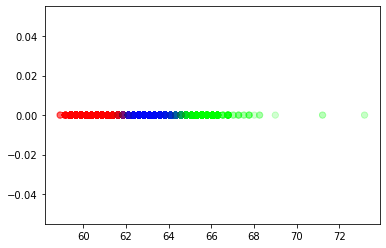

In [23]:
hist_arr = hist_arr.reshape(-1,1)
gm = GaussianMixture(n_components=3, max_iter=1000, init_params='kmeans', 
                     covariance_type='full', random_state=0).fit(hist_arr) #default init kmeans
labels = gm.predict_proba(hist_arr)
params = gm.get_params(deep = True)
fake_y = [0]*len(labels)
print(params)
print(labels) #if using predict_proba this gives class probabilities for input data points.
plt.scatter(hist_arr, fake_y, c=labels, s=40, cmap='viridis',alpha=0.02);

{'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 1000, 'means_init': None, 'n_components': 3, 'n_init': 1, 'precisions_init': None, 'random_state': 0, 'reg_covar': 1e-06, 'tol': 0.001, 'verbose': 0, 'verbose_interval': 10, 'warm_start': False, 'weights_init': None}
[[65.74225596]
 [60.45955409]
 [63.2666245 ]]
[[60.44709209]
 [65.14182139]
 [63.27360008]]
[[[0.55617285]]

 [[1.58446547]]

 [[0.29233331]]]


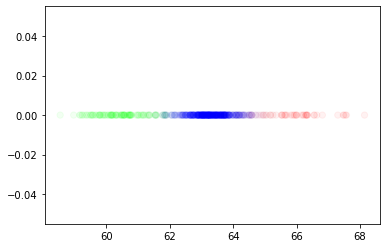

In [24]:
hist_new = gm.sample(500)
new_y = [0]*500
new_x = hist_new[0]
#plt.scatter(new_x, new_y);
gm_new = GaussianMixture(n_components=3, max_iter=1000, init_params='kmeans', 
                     covariance_type='full', random_state=0).fit(new_x) #default init kmeans
labels = gm_new.predict_proba(new_x)
params = gm_new.get_params(deep = True)
print(params)
#print(labels) #if using predict_proba this gives class probabilities for input data points.
plt.scatter(new_x, new_y, c=labels, s=40, cmap='viridis',alpha=0.05);

print(gm_new.means_)
print(gm.means_)
print(gm.covariances_)

#seems that synth data from 500 sampling has pretty much the same means, so I guess that's a good thing? 
#how to I otherwise compare true mean and fitted mean?
#do I even know the true mean? Surely not, as that's the whole point of the problem, right?

In [25]:
print('means:', gm.means_, 'covariances:', gm.covariances_, '\n')
print('means_new:', gm_new.means_, 'covariances_new:', gm_new.covariances_)

means: [[60.44709209]
 [65.14182139]
 [63.27360008]] covariances: [[[0.55617285]]

 [[1.58446547]]

 [[0.29233331]]] 

means_new: [[65.74225596]
 [60.45955409]
 [63.2666245 ]] covariances_new: [[[1.06312653]]

 [[0.59122612]]

 [[0.32963126]]]
